In [10]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx

In [7]:
def open_mat_file(path: str):
    mat_json = scipy.io.loadmat(mat_path)
    lista = [v for k, v in mat_json.items() if k[0] != '_']
    return mat_json, lista

In [8]:
mat_path = r"/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/QUINTO /MODELOS/Neurociencias-2025-1/BCT/BCT/2019_03_03_BCT/data_and_demos/fve30.mat"
json, (names, cij) = open_mat_file(mat_path)


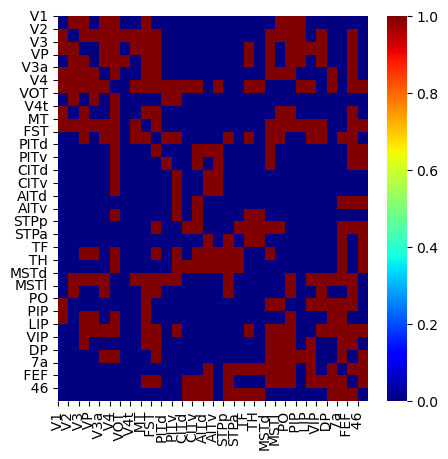

In [9]:
# Muestra el heatmap de la matriz de activación
fig = plt.figure(figsize=(5, 5))
ax = sns.heatmap(cij, cmap='jet')
plt.xticks(range(len(cij)), names, rotation='vertical')
plt.yticks(range(len(cij)), names, rotation=0)
plt.show()

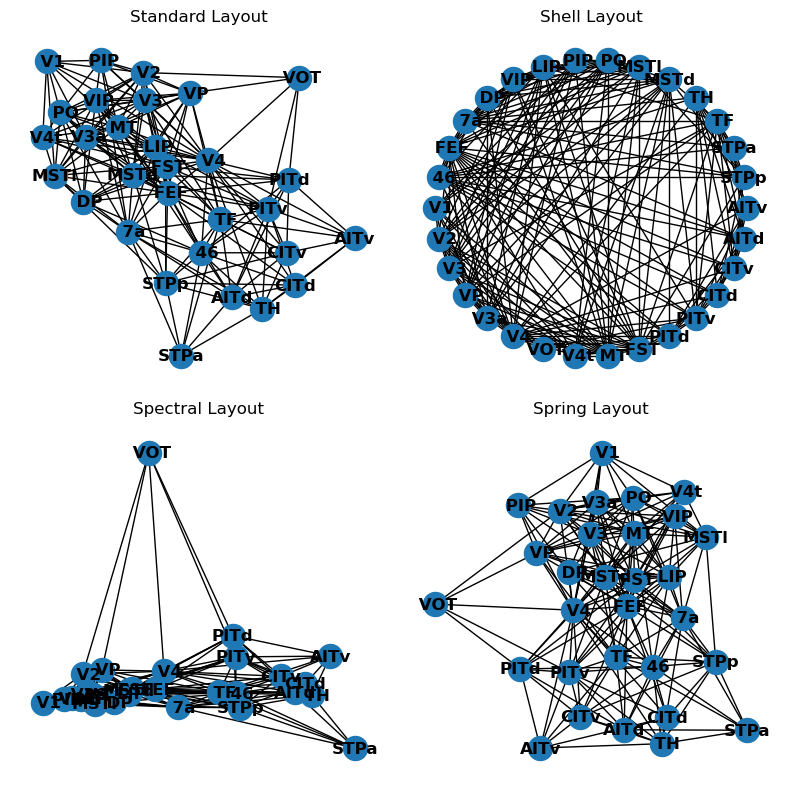

In [16]:
# Utilizando los nombres del archivo .mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)
G = nx.from_numpy_array(cij)
G.edges(data=True)
node_labels = {idx: names[idx] for idx in range(30)}
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
nx.draw(G, labels=node_labels, with_labels=True, font_weight='bold', ax=axs[0, 0])
axs[0, 0].set_title("Standard Layout")

nx.draw_shell(G, labels=node_labels, with_labels=True, font_weight='bold', ax=axs[0, 1])
axs[0, 1].set_title("Shell Layout")

nx.draw_spectral(G, labels=node_labels, with_labels=True, font_weight='bold', ax=axs[1, 0])
axs[1, 0].set_title("Spectral Layout")

nx.draw_spring(G, labels=node_labels, with_labels=True, font_weight='bold', ax=axs[1, 1])
axs[1, 1].set_title("Spring Layout")

plt.tight_layout()
plt.show()

In [29]:
# Determina el nodo con mayores conexiones
degrees = dict(G.degree()) # grado de cada uno 
max_degree_node = max(degrees, key=degrees.get)
max_degree = degrees[max_degree_node]
print(degrees)
print(node_labels.get(max_degree_node))
print(max_degree)

{0: 9, 1: 15, 2: 15, 3: 14, 4: 13, 5: 21, 6: 5, 7: 10, 8: 16, 9: 18, 10: 10, 11: 14, 12: 8, 13: 10, 14: 10, 15: 7, 16: 11, 17: 6, 18: 14, 19: 10, 20: 17, 21: 13, 22: 15, 23: 9, 24: 16, 25: 11, 26: 11, 27: 15, 28: 22, 29: 15}
 FEF
22


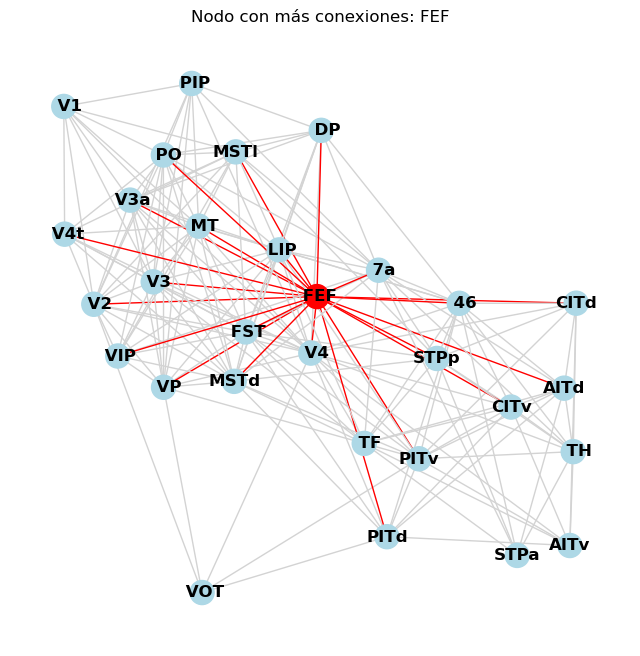

In [31]:
# Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw(
    G,
    ax=ax, 
    with_labels=True,
    labels=node_labels,
    node_color=['red' if node == max_degree_node else 'lightblue' for node in G.nodes()],  
    edge_color=['red' if max_degree_node in edge else 'lightgray' for edge in G.edges()],
    font_weight='bold'
)

plt.title(f"Nodo con más conexiones: FEF")
plt.show()